In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 11s 0us/step


In [3]:
alex_train_images = tf.image.resize(train_images, (64, 64))
alex_test_images = tf.image.resize(test_images, (64, 64))

In [8]:
X, X_CV, Y, Y_CV = train_test_split(train_images, train_labels,train_size = 0.8, random_state=1)

In [9]:
alex_train_images = tf.image.resize(X, (64, 64))
alex_train_CV_images = tf.image.resize(X_CV, (64, 64))
alex_test_images = tf.image.resize(test_images, (64, 64))

In [14]:

alex_model_32=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')


])
alex_model_32.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

In [16]:
alex_model_32.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization_10 (Ba  (None, 14, 14, 128)       512       
 tchNormalization)                                               
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_11 (Ba  (None, 7, 7, 256)         1024      
 tchNormalization)                                               
                                                      

In [15]:
history_32 = alex_model_32.fit(alex_train_images, Y, epochs=100, validation_data = (alex_train_CV_images, Y_CV), batch_size=32)

Epoch 1/100
1250/1250 [==============================] - 21s 8ms/step - loss: 2.2571 - accuracy: 0.2168 - val_loss: 1.8311 - val_accuracy: 0.3404
Epoch 2/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.8636 - accuracy: 0.3165 - val_loss: 1.5927 - val_accuracy: 0.4291
Epoch 3/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6974 - accuracy: 0.3730 - val_loss: 1.6020 - val_accuracy: 0.4194
Epoch 4/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5781 - accuracy: 0.4253 - val_loss: 1.4303 - val_accuracy: 0.4817
Epoch 5/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4797 - accuracy: 0.4623 - val_loss: 1.4168 - val_accuracy: 0.4907
Epoch 6/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.4024 - accuracy: 0.4922 - val_loss: 1.4344 - val_accuracy: 0.4778
Epoch 7/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.3280 - accuracy: 0.5199 - val_loss: 1.5392 - 

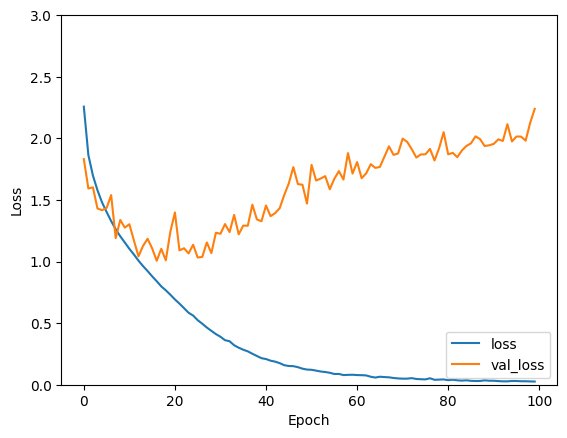

In [19]:
plt.plot(history_32.history['loss'], label='loss')
plt.plot(history_32.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend(loc='lower right')

In [20]:
test_loss, test_acc = alex_model_32.evaluate(alex_test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 2.2189 - accuracy: 0.6790 - 1s/epoch - 4ms/step


In [22]:

alex_model_10=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')


])
alex_model_10.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

alex_model_10.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization_20 (Ba  (None, 14, 14, 128)       512       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 7, 7, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_21 (Ba  (None, 7, 7, 256)         1024      
 tchNormalization)                                               
                                                      

In [25]:
history_10 = alex_model_10.fit(alex_train_images, Y, epochs=100, validation_data = (alex_train_CV_images, Y_CV), batch_size=10)

Epoch 1/100
4000/4000 [==============================] - 25s 6ms/step - loss: 1.6303 - accuracy: 0.4085 - val_loss: 1.4802 - val_accuracy: 0.4667
Epoch 2/100
4000/4000 [==============================] - 24s 6ms/step - loss: 1.4968 - accuracy: 0.4608 - val_loss: 1.3410 - val_accuracy: 0.5131
Epoch 3/100
4000/4000 [==============================] - 24s 6ms/step - loss: 1.3928 - accuracy: 0.5012 - val_loss: 1.3479 - val_accuracy: 0.5165
Epoch 4/100
4000/4000 [==============================] - 24s 6ms/step - loss: 1.3133 - accuracy: 0.5296 - val_loss: 1.2374 - val_accuracy: 0.5527
Epoch 5/100
4000/4000 [==============================] - 25s 6ms/step - loss: 1.2368 - accuracy: 0.5621 - val_loss: 1.6373 - val_accuracy: 0.4555
Epoch 6/100
4000/4000 [==============================] - 22s 6ms/step - loss: 1.1548 - accuracy: 0.5938 - val_loss: 1.1414 - val_accuracy: 0.5951
Epoch 7/100
4000/4000 [==============================] - 23s 6ms/step - loss: 1.0892 - accuracy: 0.6150 - val_loss: 1.0786 -

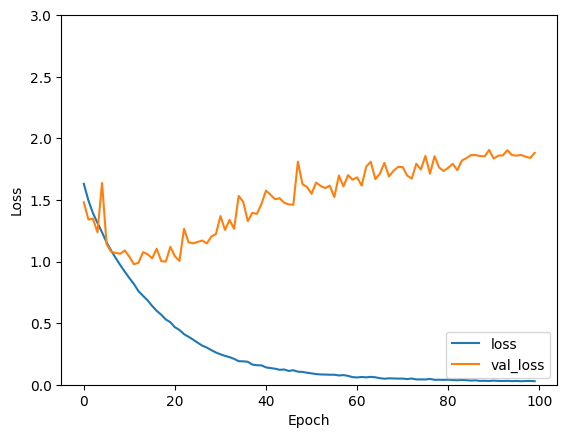

In [26]:
plt.plot(history_10.history['loss'], label='loss')
plt.plot(history_10.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend(loc='lower right')

In [27]:
test_loss, test_acc = alex_model_10.evaluate(alex_test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.9111 - accuracy: 0.6877 - 1s/epoch - 4ms/step


In [28]:

alex_model_1=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')


])
alex_model_1.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

alex_model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization_25 (Ba  (None, 14, 14, 128)       512       
 tchNormalization)                                               
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 7, 7, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_26 (Ba  (None, 7, 7, 256)         1024      
 tchNormalization)                                               
                                                      

In [30]:
history_1 = alex_model_1.fit(alex_train_images, Y, epochs=100, validation_data = (alex_train_CV_images, Y_CV), batch_size=64)

Epoch 1/100
625/625 [==============================] - 9s 13ms/step - loss: 2.2901 - accuracy: 0.1514 - val_loss: 2.1255 - val_accuracy: 0.2431
Epoch 2/100
625/625 [==============================] - 10s 16ms/step - loss: 2.1849 - accuracy: 0.1990 - val_loss: 2.0531 - val_accuracy: 0.2679
Epoch 3/100
625/625 [==============================] - 7s 12ms/step - loss: 2.1130 - accuracy: 0.2292 - val_loss: 1.9904 - val_accuracy: 0.2969
Epoch 4/100
625/625 [==============================] - 7s 11ms/step - loss: 2.0427 - accuracy: 0.2565 - val_loss: 1.9043 - val_accuracy: 0.3196
Epoch 5/100
625/625 [==============================] - 7s 12ms/step - loss: 1.9558 - accuracy: 0.2808 - val_loss: 1.8233 - val_accuracy: 0.3433
Epoch 6/100
625/625 [==============================] - 8s 13ms/step - loss: 1.8960 - accuracy: 0.3021 - val_loss: 1.7613 - val_accuracy: 0.3632
Epoch 7/100
625/625 [==============================] - 7s 11ms/step - loss: 1.8356 - accuracy: 0.3219 - val_loss: 1.7033 - val_accuracy

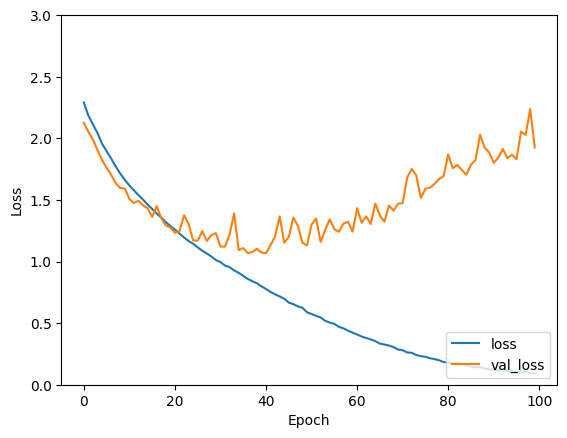

In [31]:
plt.plot(history_1.history['loss'], label='loss')
plt.plot(history_1.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend(loc='lower right')

In [32]:
test_loss, test_acc = alex_model_1.evaluate(alex_test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.9739 - accuracy: 0.6444 - 1s/epoch - 4ms/step
